**Implementation from Scratch 1**

In [ ]:
# @title Implementation from Scratch 1
import numpy as np

# ---------- Step 1: Define input and output ----------
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])  # inputs

y = np.array([
    [0],
    [1],
    [1],
    [0]
])  # expected outputs

# ---------- Step 2: Initialize parameters ----------
np.random.seed(42)

input_neurons = 2
hidden_neurons = 2
output_neurons = 1
learning_rate = 0.1

# Random weights and biases
W1 = np.random.randn(input_neurons, hidden_neurons)
b1 = np.zeros((1, hidden_neurons))
W2 = np.random.randn(hidden_neurons, output_neurons)
b2 = np.zeros((1, output_neurons))

# ---------- Step 3: Define activation functions ----------
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# ---------- Step 4: Training loop ----------
epochs = 10000
for epoch in range(epochs):
    # ----- Forward pass -----
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)  # hidden layer output
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)  # final output

    # ----- Compute loss (Mean Squared Error) -----
    loss = np.mean((y - a2) ** 2)

    # ----- Backpropagation -----
    d_a2 = (a2 - y) * sigmoid_derivative(a2)  # output layer error
    d_W2 = np.dot(a1.T, d_a2)
    d_b2 = np.sum(d_a2, axis=0, keepdims=True)

    d_a1 = np.dot(d_a2, W2.T) * sigmoid_derivative(a1)  # hidden layer error
    d_W1 = np.dot(X.T, d_a1)
    d_b1 = np.sum(d_a1, axis=0, keepdims=True)

    # ----- Update weights and biases -----
    W2 -= learning_rate * d_W2
    b2 -= learning_rate * d_b2
    W1 -= learning_rate * d_W1
    b1 -= learning_rate * d_b1

    # Print loss occasionally
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# ---------- Step 5: Test the trained model ----------
print("\nFinal predictions:")
print(a2.round(3))


Epoch 0, Loss: 0.2558
Epoch 1000, Loss: 0.2494
Epoch 2000, Loss: 0.2454
Epoch 3000, Loss: 0.2047
Epoch 4000, Loss: 0.1532
Epoch 5000, Loss: 0.1387
Epoch 6000, Loss: 0.1336
Epoch 7000, Loss: 0.1312
Epoch 8000, Loss: 0.1297
Epoch 9000, Loss: 0.1288

Final predictions:
[[0.053]
 [0.496]
 [0.951]
 [0.503]]


**Implementation from Scratch 2**

In [ ]:
# @title Implementation from Scratch 2
import numpy as np

# -----------------------------
# Helper: seed for reproducibility
# -----------------------------
np.random.seed(42)

# -----------------------------
# Step 1: Dataset (XOR)
# -----------------------------
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])  # shape (4,2)

y = np.array([
    [0],
    [1],
    [1],
    [0]
])  # shape (4,1)

# -----------------------------
# Step 2: Hyperparameters
# -----------------------------
input_neurons = 2
hidden_neurons = 2    # small hidden layer can learn XOR
output_neurons = 1
learning_rate = 0.1
epochs = 10000
print_every = 1000

# -----------------------------
# Step 3: Weight initialization
# - W1: (input_neurons, hidden_neurons)
# - b1: (1, hidden_neurons)
# - W2: (hidden_neurons, output_neurons)
# - b2: (1, output_neurons)
# -----------------------------
W1 = np.random.randn(input_neurons, hidden_neurons) * 0.5
b1 = np.zeros((1, hidden_neurons))

W2 = np.random.randn(hidden_neurons, output_neurons) * 0.5
b2 = np.zeros((1, output_neurons))

# -----------------------------
# Step 4: Activation functions
# Using sigmoid for hidden and output (simple and common for tiny examples)
# -----------------------------
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def sigmoid_derivative(sigmoid_x):
    # expects sigmoid(x) as input; derivative = s * (1 - s)
    return sigmoid_x * (1.0 - sigmoid_x)

# -----------------------------
# Step 5: Forward pass
# Returns intermediate values needed for backprop
# -----------------------------
def forward(X, W1, b1, W2, b2):
    # Hidden layer linear combination
    z1 = np.dot(X, W1) + b1       # shape (n_samples, hidden_neurons)
    a1 = sigmoid(z1)              # activated hidden (same shape)
    # Output layer
    z2 = np.dot(a1, W2) + b2      # shape (n_samples, output_neurons)
    a2 = sigmoid(z2)              # final predictions (same shape)
    return z1, a1, z2, a2

# -----------------------------
# Step 6: Loss function (MSE)
# -----------------------------
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# -----------------------------
# Step 7: Backpropagation (vectorized)
# Computes gradients for W2, b2, W1, b1
# -----------------------------
def backprop(X, y, z1, a1, z2, a2, W2):
    n = X.shape[0]  # number of samples

    # Output layer error term (dL/dz2)
    # For MSE: dL/da2 = 2*(a2 - y)/n  ; then * sigmoid'(z2)
    d_a2 = (a2 - y) * sigmoid_derivative(a2)   # shape (n, 1)

    # Gradients for W2 and b2
    dW2 = np.dot(a1.T, d_a2) / n              # shape (hidden_neurons, output_neurons)
    db2 = np.sum(d_a2, axis=0, keepdims=True) / n  # shape (1, output_neurons)

    # Hidden layer error (backprop the error)
    # d_a1 = d_a2 dot W2^T  * sigmoid'(a1)
    d_a1 = np.dot(d_a2, W2.T) * sigmoid_derivative(a1)  # shape (n, hidden_neurons)

    # Gradients for W1 and b1
    dW1 = np.dot(X.T, d_a1) / n                # shape (input_neurons, hidden_neurons)
    db1 = np.sum(d_a1, axis=0, keepdims=True) / n  # shape (1, hidden_neurons)

    return dW1, db1, dW2, db2

# -----------------------------
# Step 8: Training loop
# -----------------------------
loss_history = []
for epoch in range(1, epochs + 1):
    # Forward pass
    z1, a1, z2, a2 = forward(X, W1, b1, W2, b2)

    # Loss
    loss = mse_loss(y, a2)
    loss_history.append(loss)

    # Backpropagation
    dW1, db1, dW2, db2 = backprop(X, y, z1, a1, z2, a2, W2)

    # Parameter updates (gradient descent)
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    # Print progress occasionally
    if epoch % print_every == 0 or epoch == 1:
        print(f"Epoch {epoch}, Loss: {loss:.6f}")

# -----------------------------
# Step 9: Inspect final predictions
# -----------------------------
_, a1_final, _, a2_final = forward(X, W1, b1, W2, b2)
print("\nFinal predictions (raw probabilities):")
print(a2_final.round(4))
print("\nRounded to binary (0/1):")
print((a2_final > 0.5).astype(int))

# -----------------------------
# Optional: show loss trend min value
# -----------------------------
print(f"\nMinimum loss during training: {min(loss_history):.6f}")


Epoch 1, Loss: 0.251156
Epoch 1000, Loss: 0.250005
Epoch 2000, Loss: 0.250002
Epoch 3000, Loss: 0.249999
Epoch 4000, Loss: 0.249995
Epoch 5000, Loss: 0.249992
Epoch 6000, Loss: 0.249989
Epoch 7000, Loss: 0.249985
Epoch 8000, Loss: 0.249981
Epoch 9000, Loss: 0.249977
Epoch 10000, Loss: 0.249972

Final predictions (raw probabilities):
[[0.5021]
 [0.4967]
 [0.5034]
 [0.4979]]

Rounded to binary (0/1):
[[1]
 [0]
 [1]
 [0]]

Minimum loss during training: 0.249972


**Single - Layer Perceptron using Diabetes Dataset**

 First 5 rows:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



 Processed data sample:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1



 Accuracy: 0.7272727272727273

 Confusion Matrix:
 [[76 23]
 [19 36]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.77      0.78        99
           1       0.61      0.65      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154


 Weights: [[-0.04575225  0.18784573  0.24722499  0.15396901 -0.0208418   0.26349419
   0.05684826 -0.07121647]]
 Bias: [-0.2]


/tmp/ipython-input-1815312680.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target, data=data, palette='viridis')


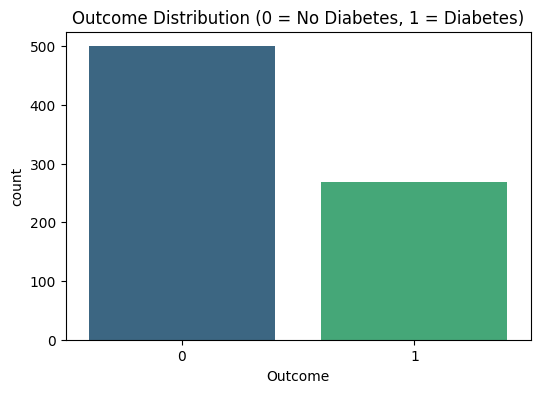

/tmp/ipython-input-1815312680.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance, y=feature_names, palette='mako')


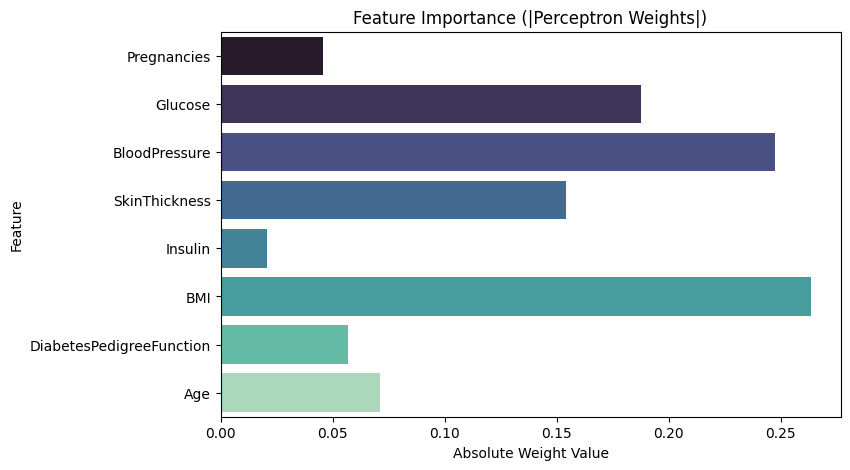

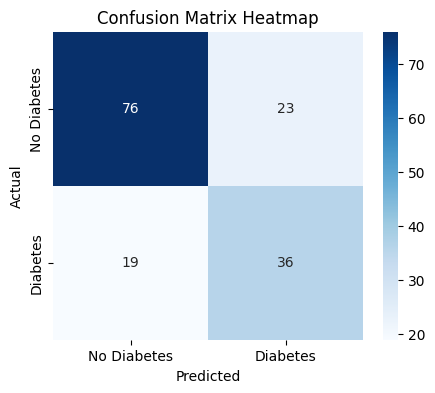

Most dominant feature: BMI


In [ ]:
# @title Single - Layer Perceptron using Diabetes Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Load Dataset
data = pd.read_csv("diabetes.csv")
print(" First 5 rows:")
display(data.head())

# 2. Select features and target
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
            'BMI', 'DiabetesPedigreeFunction', 'Age']
target = 'Outcome'
data = data[features + [target]]

# 3. Handle Missing Values (replace 0s in some columns with mean where appropriate)
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    data[col] = data[col].replace(0, np.nan)
    data[col] = data[col].fillna(data[col].mean())

print("\n Processed data sample:")
display(data.head())

# 4. Feature-Target Split
X = data.drop(target, axis=1)
y = data[target]

# 5. Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Standardize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 7. Initialize & Train Perceptron
clf = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
clf.fit(X_train, y_train)

# 8. Predictions
y_pred = clf.predict(X_test)

# 9. Model Evaluation
print("\n Accuracy:", accuracy_score(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("\n Weights:", clf.coef_)
print(" Bias:", clf.intercept_)

# 10. Visualization: Target Distribution
plt.figure(figsize=(6,4))
sns.countplot(x=target, data=data, palette='viridis')
plt.title("Outcome Distribution (0 = No Diabetes, 1 = Diabetes)")
plt.show()

# 11. Visualization: Feature Importance (Absolute Weights)
importance = np.abs(clf.coef_[0])
feature_names = X.columns

plt.figure(figsize=(8,5))
sns.barplot(x=importance, y=feature_names, palette='mako')
plt.title("Feature Importance (|Perceptron Weights|)")
plt.xlabel("Absolute Weight Value")
plt.ylabel("Feature")
plt.show()

# 12. Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes','Diabetes'], yticklabels=['No Diabetes','Diabetes'])
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#13. Most Dominent Feature
importance = np.abs(clf.coef_[0])
feature_names = X.columns
dominant_feature = feature_names[np.argmax(importance)]
print("Most dominant feature:", dominant_feature)

**Multi - Layer Perceptron using Diabetes Dataset**

 First 5 rows:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



 Processed data sample:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1



 Accuracy: 0.7142857142857143

 Confusion Matrix:
 [[75 24]
 [20 35]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.76      0.77        99
           1       0.59      0.64      0.61        55

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.71      0.72       154



/tmp/ipython-input-469647846.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target, data=data, palette='viridis')


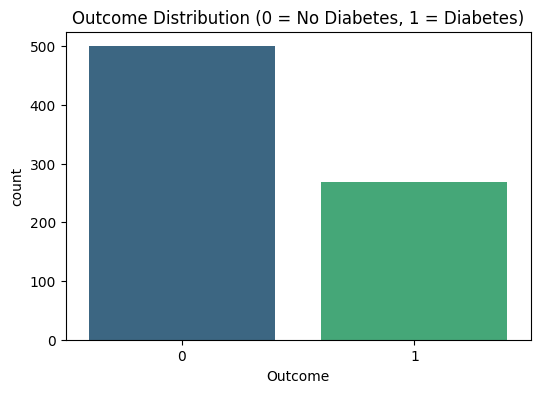

/tmp/ipython-input-469647846.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=input_importance, y=feature_names, palette='mako')


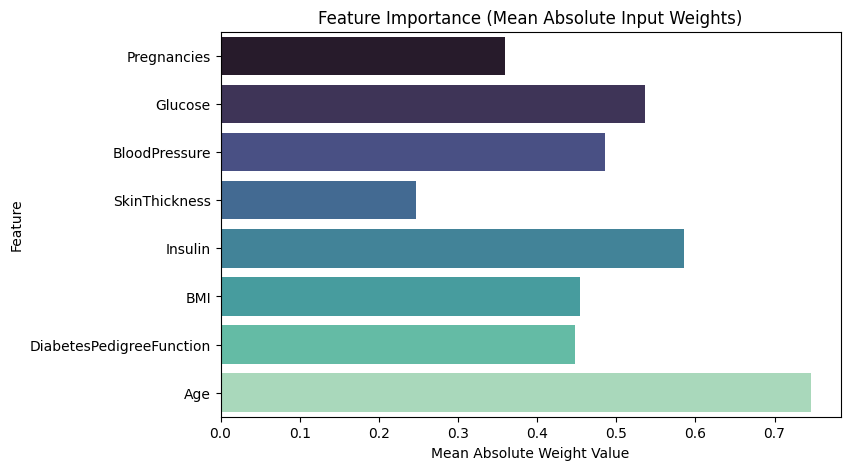

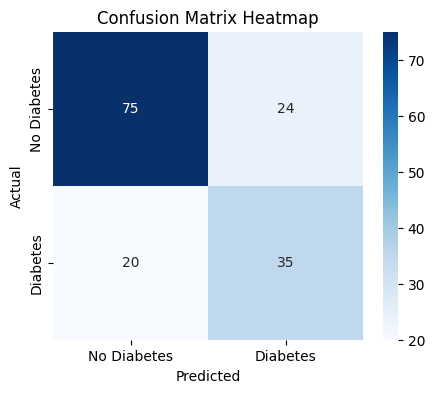

Most dominant input feature: Age


In [ ]:
# @title Multi-Layer Perceptron using Diabetes Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Load Dataset
data = pd.read_csv("diabetes.csv")
print(" First 5 rows:")
display(data.head())

# 2. Select features and target
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
            'BMI', 'DiabetesPedigreeFunction', 'Age']
target = 'Outcome'
data = data[features + [target]]

# 3. Handle Missing Values (replace 0s with mean where appropriate)
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    data[col] = data[col].replace(0, np.nan)
    data[col] = data[col].fillna(data[col].mean())

print("\n Processed data sample:")
display(data.head())

# 4. Feature-Target Split
X = data.drop(target, axis=1)
y = data[target]

# 5. Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Standardize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 7. Initialize & Train Multi-Layer Perceptron
mlp = MLPClassifier(hidden_layer_sizes=(8, 4),   # 2 hidden layers: 8 neurons → 4 neurons
                    activation='relu',           # Nonlinear activation (better than sigmoid here)
                    solver='adam',               # Adaptive optimizer
                    learning_rate_init=0.01,
                    max_iter=2000,
                    random_state=42)

mlp.fit(X_train, y_train)

# 8. Predictions
y_pred = mlp.predict(X_test)

# 9. Model Evaluation
print("\n Accuracy:", accuracy_score(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

# 10. Visualization: Target Distribution
plt.figure(figsize=(6,4))
sns.countplot(x=target, data=data, palette='viridis')
plt.title("Outcome Distribution (0 = No Diabetes, 1 = Diabetes)")
plt.show()

# 11. Visualization: Feature Importance (Approximation)
# For MLP, feature importance is not direct; we can approximate using input layer weights
input_importance = np.mean(np.abs(mlp.coefs_[0]), axis=1)
feature_names = X.columns

plt.figure(figsize=(8,5))
sns.barplot(x=input_importance, y=feature_names, palette='mako')
plt.title("Feature Importance (Mean Absolute Input Weights)")
plt.xlabel("Mean Absolute Weight Value")
plt.ylabel("Feature")
plt.show()

# 12. Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes','Diabetes'],
            yticklabels=['No Diabetes','Diabetes'])
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 13. Dominant Feature (highest input weight magnitude)
dominant_feature = feature_names[np.argmax(input_importance)]
print("Most dominant input feature:", dominant_feature)



**Task : Implement a Multi-Layer Perceptron (MLP) from scratch to predict diabetes.** <br>
Include:
* Implement prediction  and classification <br>
* From Scratch( without use of MLPClassifier ) <br>
* Make a Hard Copy

**From Seratch : Multi-Layer Perceptron using Diabetes Dataset**

In [5]:
# @title From Seratch : Multi-Layer Perceptron using Diabetes Dataset

# ---------- Step 0: Imports ----------
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ---------- Step 1: Load and preprocess dataset ----------
data = pd.read_csv("diabetes.csv")

features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
            'BMI', 'DiabetesPedigreeFunction', 'Age']
target = 'Outcome'

# Replace zeros with mean for certain features
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    data[col] = data[col].replace(0, np.nan)
    data[col] = data[col].fillna(data[col].mean())

X = data[features].values
y = data[target].values.reshape(-1, 1)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------- Step 2: Initialize network parameters ----------
np.random.seed(42)
input_neurons = X_train.shape[1]
hidden_neurons = 8
output_neurons = 1
learning_rate = 0.01
epochs = 10000

# Random weights and biases
W1 = np.random.randn(input_neurons, hidden_neurons)
b1 = np.zeros((1, hidden_neurons))
W2 = np.random.randn(hidden_neurons, output_neurons)
b2 = np.zeros((1, output_neurons))

# ---------- Step 3: Activation functions ----------
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# ---------- Step 4: Training loop ----------
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(X_train, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    # Loss: Mean Squared Error
    loss = np.mean((y_train - a2) ** 2)

    # Backpropagation
    d_a2 = (a2 - y_train) * sigmoid_derivative(a2)
    d_W2 = np.dot(a1.T, d_a2)
    d_b2 = np.sum(d_a2, axis=0, keepdims=True)

    d_a1 = np.dot(d_a2, W2.T) * sigmoid_derivative(a1)
    d_W1 = np.dot(X_train.T, d_a1)
    d_b1 = np.sum(d_a1, axis=0, keepdims=True)

    # Update weights and biases
    W2 -= learning_rate * d_W2
    b2 -= learning_rate * d_b2
    W1 -= learning_rate * d_W1
    b1 -= learning_rate * d_b1

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# ---------- Step 5: Prediction ----------
z1_test = np.dot(X_test, W1) + b1
a1_test = sigmoid(z1_test)
z2_test = np.dot(a1_test, W2) + b2
a2_test = sigmoid(z2_test)

y_pred = (a2_test >= 0.5).astype(int)

# ---------- Step 6: Evaluation ----------
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ---------- Step 7: Most dominant feature ----------
input_importance = np.mean(np.abs(W1), axis=1)  # Mean absolute weight per input feature
dominant_feature = features[np.argmax(input_importance)]
print("\nMost dominant feature (highest input weight magnitude):", dominant_feature)


Epoch 0, Loss: 0.5402
Epoch 1000, Loss: 0.1289
Epoch 2000, Loss: 0.1164
Epoch 3000, Loss: 0.1016
Epoch 4000, Loss: 0.0943
Epoch 5000, Loss: 0.0898
Epoch 6000, Loss: 0.0870
Epoch 7000, Loss: 0.0849
Epoch 8000, Loss: 0.0831
Epoch 9000, Loss: 0.0815

Accuracy: 0.7012987012987013

Confusion Matrix:
 [[74 25]
 [21 34]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.75      0.76        99
           1       0.58      0.62      0.60        55

    accuracy                           0.70       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.71      0.70      0.70       154


Most dominant feature (highest input weight magnitude): Insulin
